In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from sklego.datasets import load_penguins

df = load_penguins(as_frame=True).dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [3]:
from hulearn.experimental.interactive import InteractiveClassifierCharts, InteractiveChart

In [4]:
clf = InteractiveClassifierCharts(df, labels="species")

Loading BokehJS ...

In [6]:
clf.add_chart(x="bill_length_mm", y="bill_depth_mm")

In [8]:
clf.add_chart(x="flipper_length_mm", y="body_mass_g")

In [10]:
import json 
import pathlib 

demo_data = clf.data()
clf.to_json("drawn-model.json")
demo_data

[{'chart_id': '3c680a70-0',
  'x': 'bill_length_mm',
  'y': 'bill_depth_mm',
  'polygons': {'Adelie': {'bill_length_mm': [[32.14132787891895,
      32.84074984423687,
      38.78583654943918,
      46.829189150595255,
      47.17890013325422,
      43.68179030666462,
      35.63843770550855]],
    'bill_depth_mm': [[15.406862190509665,
      19.177207018095874,
      21.487207018095873,
      21.5934139146476,
      19.217943123601575,
      16.640631196069247,
      15.244587235322568]]},
   'Gentoo': {'bill_length_mm': [[58.10736834134671,
      50.501154468514336,
      40.18468048007502,
      40.09725273441028,
      44.556067763312015,
      53.12398683845653,
      58.894218052329364,
      60.76142402357685]],
    'bill_depth_mm': [[17.284959177952327,
      17.553429170403614,
      14.627106252684614,
      13.201081726611287,
      12.051605398390103,
      13.827533449580619,
      15.667347786949287,
      17.024587871893388]]},
   'Chinstrap': {'bill_length_mm': [[44.1189

You could save this data to disk if you like.

In [11]:
pathlib.Path("demo_data.json").write_text(json.dumps(demo_data))
data = json.loads(pathlib.Path("demo_data.json").read_text())

In [13]:
from hulearn.classification import InteractiveClassifier

model = InteractiveClassifier(json_desc=demo_data)

In [15]:
X, y = df.drop(columns=['species']), df['species']

preds = model.fit(X, y).predict_proba(X)
preds[:5]

array([[9.99001498e-01, 4.99251123e-04, 4.99251123e-04],
       [6.66333666e-01, 3.33000333e-04, 3.33333333e-01],
       [6.66333666e-01, 3.33000333e-04, 3.33333333e-01],
       [6.66333666e-01, 3.33000333e-04, 3.33333333e-01],
       [6.66333666e-01, 3.33000333e-04, 3.33333333e-01]])

In [22]:
model.classes_

['Adelie', 'Gentoo', 'Chinstrap']

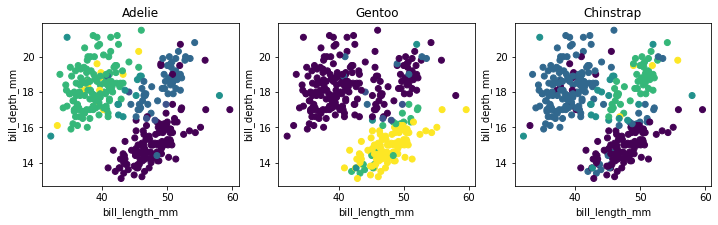

In [27]:
import matplotlib.pylab as plt 

plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(131 + i)
    plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=preds[:, i])
    plt.xlabel('bill_length_mm')
    plt.ylabel('bill_depth_mm')
    plt.title(model.classes_[i])

In [ ]:
import matplotlib.pylab as plt 

plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(131 + i)
    plt.scatter(X['flipper_length_mm'], X['body_mass_g'], c=preds[:, i])
    plt.xlabel('flipper_length_mm')
    plt.ylabel('body_mass_g')
    plt.title(model.classes_[i])